<a href="https://colab.research.google.com/github/ekpurwanto/E-Commerce-Public-Dataset/blob/main/E_Commerce_Public_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Menentukan Pertanyaan Bisnis



1.   Berapa banyak pelanggan yang ada dalam dataset customers_dataset?
2.   Apa unique ID dari pelanggan dengan customer_id tertentu dalam dataset customers_dataset?
3.



## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np  # aljabar linear
import os
import pandas as pd  # pengolahan data
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.express as px # data visualization
from plotly.subplots import make_subplots # data visualization


##Gathering Data

mengumpulkan semua data yang diperlukan dari dataset E-Comerce Public

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/customers_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/orders_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_payments_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/order_items_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/sellers_dataset.csv')
product_category_translation_df = pd.read_csv('/content/drive/MyDrive/Dicoding/E-Commerce Public Dataset/product_category_name_translation.csv')

## Assesing Data



Mengevaluasi dataset mencakup mengidentifikasi masalah seperti data yang hilang, data yang tidak valid, atau duplikat.

Customers Dataframe

In [ ]:
# Menampilkan beberapa baris pertama dari setiap DataFrame
print("Customers DataFrame:")
customers_df.head()

In [ ]:
#check column and value dataset info
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
#check data size
customers_df.shape

(99441, 5)

In [ ]:
# Identifying missing values
customers_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,customer_id,0
1,customer_unique_id,0
2,customer_zip_code_prefix,0
3,customer_city,0
4,customer_state,0


In [ ]:
# Identifying duplicates values
customers_df[customers_df.duplicated(keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [ ]:
# Identifying inconsistencies in the customer_state column
customers_df.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Order Dataframe

In [ ]:
print("\nOrders DataFrame:")
orders_df.head()


Orders DataFrame:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#check column and value dataset info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
#check data size
orders_df.shape

(99441, 8)

In [ ]:
# Identifying missing values
orders_df.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,160
5,order_delivered_carrier_date,1783
6,order_delivered_customer_date,2965
7,order_estimated_delivery_date,0


In [ ]:
# Identifying duplicates values
orders_df[customers_df.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [ ]:
print("\nOrder Reviews DataFrame:")
order_reviews_df.head()


Order Reviews DataFrame:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
print("\nOrder Payments DataFrame:")
order_payments_df.head()


Order Payments DataFrame:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
print("\nOrder Items DataFrame:")
order_items_df.head()


Order Items DataFrame:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
print("\nProducts DataFrame:")
products_df.head()


Products DataFrame:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print("\nSellers DataFrame:")
sellers_df.head()


Sellers DataFrame:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
print("\nProduct Category Translation DataFrame:")
product_category_translation_df.head()


Product Category Translation DataFrame:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Fungsi untuk menilai persentase missing values di setiap DataFrame
def assess_missing_percentage(df, df_name):
    missing_percentage = df.isna().mean() * 100
    print("Persentase data yang hilang dalam DataFrame {}:\n".format(df_name))
    for column, percentage in missing_percentage.iteritems():
        print('{}: {:.2f}%'.format(column, percentage))

# Melakukan penilaian data untuk setiap DataFrame
assess_missing_percentage(customers_df, "customers_df")
assess_missing_percentage(orders_df, "orders_df")
assess_missing_percentage(order_reviews_df, "order_reviews_df")
assess_missing_percentage(order_payments_df, "order_payments_df")
assess_missing_percentage(order_items_df, "order_items_df")
assess_missing_percentage(products_df, "products_df")
assess_missing_percentage(sellers_df, "sellers_df")
assess_missing_percentage(product_category_translation_df, "product_category_translation_df")

Persentase data yang hilang dalam DataFrame customers_df:

customer_id: 0.00%
customer_unique_id: 0.00%
customer_zip_code_prefix: 0.00%
customer_city: 0.00%
customer_state: 0.00%
Persentase data yang hilang dalam DataFrame orders_df:

order_id: 0.00%
customer_id: 0.00%
order_status: 0.00%
order_purchase_timestamp: 0.00%
order_approved_at: 0.16%
order_delivered_carrier_date: 1.79%
order_delivered_customer_date: 2.98%
order_estimated_delivery_date: 0.00%
Persentase data yang hilang dalam DataFrame order_reviews_df:

review_id: 0.00%
order_id: 0.00%
review_score: 0.00%
review_comment_title: 88.34%
review_comment_message: 58.70%
review_creation_date: 0.00%
review_answer_timestamp: 0.00%
Persentase data yang hilang dalam DataFrame order_payments_df:

order_id: 0.00%
payment_sequential: 0.00%
payment_type: 0.00%
payment_installments: 0.00%
payment_value: 0.00%


<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():


Persentase data yang hilang dalam DataFrame order_items_df:

order_id: 0.00%
order_item_id: 0.00%
product_id: 0.00%
seller_id: 0.00%
shipping_limit_date: 0.00%
price: 0.00%
freight_value: 0.00%
Persentase data yang hilang dalam DataFrame products_df:

product_id: 0.00%
product_category_name: 1.85%
product_name_lenght: 1.85%
product_description_lenght: 1.85%
product_photos_qty: 1.85%
product_weight_g: 0.01%
product_length_cm: 0.01%
product_height_cm: 0.01%
product_width_cm: 0.01%
Persentase data yang hilang dalam DataFrame sellers_df:

seller_id: 0.00%
seller_zip_code_prefix: 0.00%
seller_city: 0.00%
seller_state: 0.00%
Persentase data yang hilang dalam DataFrame product_category_translation_df:

product_category_name: 0.00%
product_category_name_english: 0.00%


<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():
<ipython-input-45-948e8974099b>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, percentage in missing_percentage.iteritems():


##Cleaning Data

In [ ]:
# Terdapat banyak sekali nilai yang hilang di kolom kategori produk
# Sebelum menghapus semua nilai yang hilang ini, pertimbangkan untuk menghitung proporsi transaksi yang hilang terhadap total transaksi.
missing_val_transaction = a.payment_value.sum()
total_transaksi = pendapatan_produk.payment_value.sum()
prop = missing_val_transaction / total_transaksi * 100
print(f'Persentase transaksi nilai yang hilang terhadap total transaksi = {prop:.2f}%')

Persentase transaksi nilai yang hilang terhadap total transaksi = 1.25%


In [ ]:
# Agar mendapatkan pemahaman yang jelas:
# (Opsi 1) semua kategori_produk harus diisi atau
# (Opsi 2) nilai yang hilang dalam product_category harus dihapus

# Karena proporsi transaksi dengan nilai yang hilang terhadap total transaksi = 1.25%, maka menghapus nilai ini tidak akan mempengaruhi analisis secara signifikan.
pendapatan_produk = pendapatan_produk.dropna()

In [ ]:
# Identifikasi duplicates values
pendapatan_produk[pendapatan_produk.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category
12,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,RJ,1.0,credit_card,1.0,259.06,08574b074924071f4e201e151b152b4e,garden_tools
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,RJ,1.0,credit_card,1.0,259.06,08574b074924071f4e201e151b152b4e,garden_tools
57,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,RS,1.0,credit_card,2.0,151.04,f48eb5c2fde13ca63664f0bb05f55346,sports_leisure
58,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,RS,1.0,credit_card,2.0,151.04,f48eb5c2fde13ca63664f0bb05f55346,sports_leisure
63,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,SE,1.0,credit_card,9.0,91.68,b37b72d5a56f887725c2862184b8cab8,telephony
...,...,...,...,...,...,...,...,...,...,...,...
114985,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,SP,1.0,credit_card,9.0,239.50,4f18ca9862f511ecba98258b2194d061,furniture_bedroom
115003,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,SP,1.0,credit_card,10.0,748.24,0df37da38a30a713453b03053d60d3f7,sports_leisure
115004,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,SP,1.0,credit_card,10.0,748.24,0df37da38a30a713453b03053d60d3f7,sports_leisure
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,RJ,1.0,credit_card,4.0,441.16,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories


In [ ]:
# Menghapus duplicates values
pendapatan_produk = pendapatan_produk.drop_duplicates(keep='first') # Hapus data duplikat dan simpan data pertama yang muncul
pendapatan_produk = pendapatan_produk.reset_index(drop = True) # Reset Indeks kolom
pendapatan_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103172 entries, 0 to 103171
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103172 non-null  object        
 1   customer_id               103172 non-null  object        
 2   order_status              103172 non-null  object        
 3   order_purchase_timestamp  103172 non-null  datetime64[ns]
 4   customer_state            103172 non-null  object        
 5   payment_sequential        103172 non-null  float64       
 6   payment_type              103172 non-null  object        
 7   payment_installments      103172 non-null  float64       
 8   payment_value             103172 non-null  float64       
 9   product_id                103172 non-null  object        
 10  product_category          103172 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.7+ MB

In [ ]:
# Identifikasi inkonsisten pada kolom product_category
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pendapatan_produk.product_category.value_counts()

bed_bath_table                             10651
health_beauty                               9106
sports_leisure                              7945
furniture_decor                             6977
computers_accessories                       6954
housewares                                  6228
watches_gifts                               5874
telephony                                   4345
toys                                        4044
auto                                        4037
cool_stuff                                  3765
garden_tools                                3709
perfumery                                   3301
baby                                        2982
electronics                                 2608
stationery                                  2425
fashion_bags_accessories                    2051
pet_shop                                    1825
office_furniture                            1347
luggage_accessories                         1105
consoles_games      

In [ ]:
pendapatan_produk

,order_id,customer_id,order_status,order_purchase_timestamp,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,SP,1.0,credit_card,1.0,18.12,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,SP,3.0,voucher,1.0,2.00,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,SP,2.0,voucher,1.0,18.59,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,BA,1.0,boleto,1.0,141.46,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,GO,1.0,credit_card,3.0,179.12,aa4383b373c6aca5d8797843e5594415,auto
...,...,...,...,...,...,...,...,...,...,...,...
103167,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,SP,1.0,credit_card,3.0,85.08,ac35486adb7b02598c182c2ff2e05254,health_beauty
103168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,SP,1.0,credit_card,3.0,195.00,f1d4ce8c6dd66c47bbaa8c6781c2a923,baby
103169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,BA,1.0,credit_card,5.0,271.01,b80910977a37536adeddd63663f916ad,home_appliances_2
103170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,RJ,1.0,credit_card,4.0,441.16,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories


In [ ]:
kategori_order = pendapatan_produk[['order_id', 'customer_id', 'customer_state', 'product_category']]
kategori_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103172 entries, 0 to 103171
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          103172 non-null  object
 1   customer_id       103172 non-null  object
 2   customer_state    103172 non-null  object
 3   product_category  103172 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [ ]:
# Identifikasi missing values
kategori_order.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,order_id,0
1,customer_id,0
2,customer_state,0
3,product_category,0


In [ ]:
# Identifikasi duplicates values
kategori_order[kategori_order.duplicated(keep=False)]

,order_id,customer_id,customer_state,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,housewares
10,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,SP,office_furniture
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,SP,office_furniture
...,...,...,...,...
103161,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,MT,toys
103162,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,MT,toys
103163,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,MT,toys
103164,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,MG,health_beauty


In [ ]:
# Menghapus duplicates values
kategori_order = kategori_order.drop_duplicates(keep='first') # Menghapus data duplikat dan simpan data pertama yang muncul
kategori_order = kategori_order.reset_index(drop = True) # Reset Indeks Kolom
kategori_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95863 entries, 0 to 95862
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          95863 non-null  object
 1   customer_id       95863 non-null  object
 2   customer_state    95863 non-null  object
 3   product_category  95863 non-null  object
dtypes: object(4)
memory usage: 2.9+ MB


In [ ]:
kategori_order

,order_id,customer_id,customer_state,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,BA,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,GO,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,RN,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,SP,stationery
...,...,...,...,...
95858,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,SP,health_beauty
95859,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,SP,baby
95860,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,BA,home_appliances_2
95861,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,RJ,computers_accessories


## Exploratory Data Analysis (EDA)

### Explore ...

1. Apa saja 5 negara bagian penghasil pendapatan terbesar?

In [ ]:
# From table 1, group by 'customer_state' and sum the 'payment_value' for each state
pendapatan_by_area = pendapatan_area.groupby('customer_state')['payment_value'].sum().reset_index()

# Sort the summary by highest revenue in descending order
pendapatan_by_area = pendapatan_by_area.sort_values(by='payment_value', ascending=False)
pendapatan_by_area.columns = ['Area', 'Pendapatan']
pendapatan_by_area

,Area,Pendapatan
25,SP,5770266.19
18,RJ,2055690.45
10,MG,1819277.61
22,RS,861802.40
17,PR,781919.55
23,SC,595208.40
4,BA,591270.60
6,DF,346146.17
8,GO,334294.22
7,ES,317682.65


In [ ]:
def persentase_pendapatan_5_tertinggi(ringkasan_pendapatan):
    # Sort the revenue summary by highest revenue in descending order
    ringkasan_pendapatan = ringkasan_pendapatan.sort_values(by='Pendapatan', ascending=False)

    # Select the top 5 states
    top_5_area = ringkasan_pendapatan.head(5)

    # Calculate the total revenue contributed by the top 5 states
    top_5_pendapatan = top_5_area['Pendapatan'].sum()

    # Calculate the total revenue
    total_pendapatan = ringkasan_pendapatan['Pendapatan'].sum()

    # Calculate the percentage of total revenue contributed by the top 5 states
    persentase = (top_5_pendapatan / total_pendapatan) * 100

    return persentase

# Calculate the percentage of top 5 states revenue
top_5_persentase = persentase_pendapatan_5_tertinggi(pendapatan_by_area)  # Menggunakan pendapatan_by_area yang sudah dihitung sebelumnya
print(f'Persentase total pendapatan yang dikontribusikan oleh 5 area teratas: {top_5_persentase:.2f}%')


Persentase total pendapatan yang dikontribusikan oleh 5 area teratas: 73.20%


In [ ]:
persentase_pendapatan_5_tertinggi(pendapatan_by_area)

73.19814675734483

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Create viz1 dataframe for visualization of revenue by state
vis1 = pendapatan_by_area

# Create the visualization of revenue by state
fig = px.bar(data_frame=vis1, x='Area', y='Pendapatan', title='5 Area penghasil pendapatan teratas?')
fig.show()


### Pertanyaan 2:

In [ ]:
pendapatan_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100756
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  100756 non-null  object        
 1   customer_id               100756 non-null  object        
 2   order_status              100756 non-null  object        
 3   order_purchase_timestamp  100756 non-null  datetime64[ns]
 4   customer_unique_id        100756 non-null  object        
 5   customer_zip_code_prefix  100756 non-null  int64         
 6   customer_city             100756 non-null  object        
 7   customer_state            100756 non-null  object        
 8   payment_sequential        100756 non-null  float64       
 9   payment_type              100756 non-null  object        
 10  payment_installments      100756 non-null  float64       
 11  payment_value             100756 non-null  float64       
dtypes:

In [ ]:
# Membuat fungsi untuk menghitung pendapatan bulanan untuk area tertentu per tahun-bulan
# Menggunakan tabel 1 (pendapatan_area), kolom negara bagian dan negara bagian tertentu sebagai input

def kalkulasi_pendapatan_bulanan(pendapatan_area, area_column, area=None):
    # Filter the DataFrame by state if states are provided
    if area:
        pendapatan_area = pendapatan_area[pendapatan_area[area_column].isin(area)]

    # Extract the year and month from the 'order_purchase_timestamp' column
    pendapatan_area['tahun'] = pendapatan_area['order_purchase_timestamp'].dt.year
    pendapatan_area['bulan'] = pendapatan_area['order_purchase_timestamp'].dt.month

    # Group by year, month, and state (if filtered by state) and sum the revenue
    group_columns = ['tahun', 'bulan']
    if area_column in pendapatan_area.columns:
        group_columns.append(area_column)
    pendapatan_bulanan = pendapatan_area.groupby(group_columns)['payment_value'].sum().reset_index()

    # Sort the result by year and month
    pendapatan_bulanan = pendapatan_bulanan.sort_values(by=['customer_state', 'tahun', 'bulan']).reset_index(drop=True)

    # Create a 'year_month' column as a string for the period and return the result
    pendapatan_bulanan['tahun_bulan'] = pendapatan_bulanan['tahun'].astype(str) + '-' + pendapatan_bulanan['bulan'].astype(str)
    pendapatan_bulanan.columns = ['tahun', 'bulan', 'area', 'pendapatan', 'tahun_bulan']
    return pendapatan_bulanan

# Calculate monthly revenue for specific states
pendapatan_bulanan_SP = kalkulasi_pendapatan_bulanan(pendapatan_area, 'customer_state', area=['SP'])
pendapatan_bulanan_RJ = kalkulasi_pendapatan_bulanan(pendapatan_area, 'customer_state', area=['RJ'])
pendapatan_bulanan_MG = kalkulasi_pendapatan_bulanan(pendapatan_area, 'customer_state', area=['MG'])
pendapatan_bulanan_RS = kalkulasi_pendapatan_bulanan(pendapatan_area, 'customer_state', area=['RS'])
pendapatan_bulanan_PR = kalkulasi_pendapatan_bulanan(pendapatan_area, 'customer_state', area=['PR'])


<ipython-input-83-465469cab4cc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-465469cab4cc>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-465469cab4cc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-4654

In [ ]:
pendapatan_bulanan_SP

,tahun,bulan,area,pendapatan,tahun_bulan
0,2016,10,SP,13559.93,2016-10
1,2017,1,SP,44838.14,2017-1
2,2017,2,SP,84444.00,2017-2
3,2017,3,SP,147665.99,2017-3
4,2017,4,SP,138822.04,2017-4
5,2017,5,SP,195065.48,2017-5
6,2017,6,SP,191008.60,2017-6
7,2017,7,SP,204486.52,2017-7
8,2017,8,SP,219219.25,2017-8
9,2017,9,SP,238785.05,2017-9


In [ ]:
import plotly.graph_objects as go  # Import modul Plotly

# Create a subplot with 1 row and 1 column
fig = make_subplots(rows=1, cols=1, subplot_titles=('Perbandingan Tren Pendapatan Area'))

# Add Plotly Express plots to the subplot
fig.add_trace(go.Scatter(x=pendapatan_bulanan_SP['tahun_bulan'], y=pendapatan_bulanan_SP['pendapatan'], mode='lines', name='SP'))
fig.add_trace(go.Scatter(x=pendapatan_bulanan_RJ['tahun_bulan'], y=pendapatan_bulanan_RJ['pendapatan'], mode='lines', name='RJ'))
fig.add_trace(go.Scatter(x=pendapatan_bulanan_MG['tahun_bulan'], y=pendapatan_bulanan_MG['pendapatan'], mode='lines', name='MG'))
fig.add_trace(go.Scatter(x=pendapatan_bulanan_RS['tahun_bulan'], y=pendapatan_bulanan_RS['pendapatan'], mode='lines', name='RS'))
fig.add_trace(go.Scatter(x=pendapatan_bulanan_PR['tahun_bulan'], y=pendapatan_bulanan_PR['pendapatan'], mode='lines', name='PR'))

# Update subplot title (optional)
fig.update_layout(title_text='Perbandingan Tren Pendapatan Area',
                  autosize=False,
                  width=1000,
                  height=600)

# Show the plot
fig.show()


In [ ]:
order_by_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96477 entries, 0 to 96476
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96477 non-null  object        
 1   order_status              96477 non-null  object        
 2   order_purchase_timestamp  96477 non-null  datetime64[ns]
 3   customer_state            96477 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.9+ MB


In [ ]:
# Create function to calculate monthly orders for specific state per year-month
# Use table 2 (order_states), state column and specific states as an input

def order_per_bulan(order_by_area, state_column, area=None):
    # Filter the DataFrame by state if states are provided
    if area:
        order_by_area = order_by_area[order_by_area[state_column].isin(area)]

    # Extract the year and month from the 'order_purchase_timestamp' column
    order_by_area['tahun'] = order_by_area['order_purchase_timestamp'].dt.year
    order_by_area['bulan'] = order_by_area['order_purchase_timestamp'].dt.month

    # Group by year, month, and state (if filtered by state) and count the order_id
    group_columns = ['tahun', 'bulan']
    if state_column in order_by_area.columns:
        group_columns.append(state_column)
    order_per_bulan = order_by_area.groupby(group_columns)['order_id'].count().reset_index()

    # Sort the result by year and month
    order_per_bulan = order_per_bulan.sort_values(by=['customer_state', 'tahun', 'bulan']).reset_index(drop=True)

    # Create a 'year_month' column as a string for the period and return the result
    order_per_bulan['year_month'] = order_per_bulan['tahun'].astype(str) + '-' + order_per_bulan['bulan'].astype(str)
    order_per_bulan.columns = ['tahun', 'bulan', 'area', 'nomor order', 'tahun_bulan']
    return order_per_bulan

# Calculate monthly revenue for specific states
order_per_bulan_SP = order_per_bulan(order_by_area, 'customer_state', area=['SP'])
order_per_bulan_RJ = order_per_bulan(order_by_area, 'customer_state', area=['RJ'])
order_per_bulan_MG = order_per_bulan(order_by_area, 'customer_state', area=['MG'])
order_per_bulan_RS = order_per_bulan(order_by_area, 'customer_state', area=['RS'])
order_per_bulan_PR = order_per_bulan(order_by_area, 'customer_state', area=['PR'])

<ipython-input-105-bd2df97dafe1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-bd2df97dafe1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-bd2df97dafe1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-

In [ ]:
order_per_bulan_SP

,tahun,bulan,area,nomor order,tahun_bulan
0,2016,10,SP,94,2016-10
1,2017,1,SP,283,2017-1
2,2017,2,SP,601,2017-2
3,2017,3,SP,966,2017-3
4,2017,4,SP,873,2017-4
5,2017,5,SP,1363,2017-5
6,2017,6,SP,1284,2017-6
7,2017,7,SP,1543,2017-7
8,2017,8,SP,1665,2017-8
9,2017,9,SP,1576,2017-9


In [ ]:
# Create a subplot with 1 row and 1 column
fig = make_subplots(rows=1, cols=1, subplot_titles=('Orders Trend in 5 Areas'))

# Add Plotly Express plots to the subplot
fig.add_trace(go.Scatter(x=order_per_bulan_SP['tahun_bulan'], y=order_per_bulan_SP['nomor order'], name='SP'))
fig.add_trace(go.Scatter(x=order_per_bulan_RJ['tahun_bulan'], y=order_per_bulan_RJ['nomor order'], name='RJ'))
fig.add_trace(go.Scatter(x=order_per_bulan_MG['tahun_bulan'], y=order_per_bulan_MG['nomor order'], name='MG'))
fig.add_trace(go.Scatter(x=order_per_bulan_RS['tahun_bulan'], y=order_per_bulan_RS['nomor order'], name='RS'))
fig.add_trace(go.Scatter(x=order_per_bulan_PR['tahun_bulan'], y=order_per_bulan_PR['nomor order'], name='PR'))

# Update subplot title (optional)
fig.update_layout(title_text='Tren Order (pertumbuhan order) di 5 Area',
                  autosize=False,
                  width=1000,
                  height=600)

# Show the plot
fig.show()


In [ ]:
# Group data and count orders and products per state
group_data = pendapatan_produk.groupby('customer_state').agg(
    num_orders=pd.NamedAgg(column='order_id', aggfunc='nunique'),
    num_products=pd.NamedAgg(column='product_id', aggfunc='nunique')
).reset_index()

# Filtering using DataFrame.loc[]
top_5_area = ['SP','RJ','MG','RS','PR']
group_top_5_area = group_data.loc[group_data['customer_state'].isin(top_5_area)].reset_index(drop=True)

# Calculate the correlation coefficient
num_orders = group_top_5_area.loc[:,'num_orders']
num_products = group_top_5_area.loc[:,'num_products']

korelasi_matrix = np.corrcoef(num_products, num_orders)
korelasi_top_5_area = korelasi_matrix[0, 1]

print(group_top_5_area)
print("Correlation:", korelasi_top_5_area)

  customer_state  num_orders  num_products
0             MG       11187          7091
1             PR        4855          3651
2             RJ       12166          7537
3             RS        5268          3881
4             SP       39953         18387
Correlation: 0.997581305277687


In [ ]:
# Create scatter plot for each state with x-axis as 'num_products' and y-axis as 'num_orders'
fig = px.scatter(group_top_5_area, x='num_products', y='num_orders', color='customer_state',
                 title='Korelasi Jumlah Produk yang Terjual dan Jumlah Order')

# Customize the plot (optional)
fig.update_traces(marker=dict(size=12))  # Adjust marker size
fig.update_layout(legend_title_text='State',
                  width=600,
                  height=600)  # Set legend title, width and height

# Show the plot
fig.show()

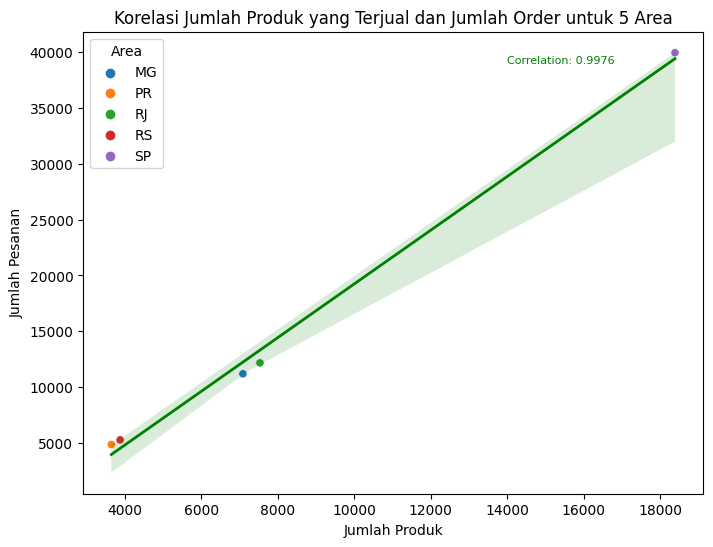

In [ ]:
# Calculate the correlation coefficient
correlation_coefficient = group_top_5_area['num_products'].corr(group_top_5_area['num_orders'])

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=group_top_5_area, x='num_products', y='num_orders', hue='customer_state')

# Add the correlation line using Seaborn's regplot
sns.regplot(data=group_top_5_area, x='num_products', y='num_orders', scatter=False, color='green', line_kws={"linewidth": 2})

# Customize the plot (optional)
plt.title('Korelasi Jumlah Produk yang Terjual dan Jumlah Order untuk 5 Area')
plt.xlabel('Jumlah Produk')
plt.ylabel('Jumlah Pesanan')
plt.legend(title='Area')

# Add the correlation coefficient as text to the plot
plt.text(14000, 39000, f'Correlation: {correlation_coefficient:.4f}', fontsize=8, color='green')

# Show the plot
plt.show()


In [ ]:
# Calculate correlation coefficient for all states between num_orders and num_products

num_order_all = group_data.loc[:,'num_orders']
num_produk_all = group_data.loc[:,'num_products']

correlation_matrix = np.corrcoef(num_produk_all, num_order_all)
correlation_all = correlation_matrix[0, 1]

print(group_data)
print("Correlation:", correlation_all)

   customer_state  num_orders  num_products
0              AC          78            79
1              AL         393           361
2              AM         144           144
3              AP          67            69
4              BA        3214          2528
5              CE        1266          1065
6              DF        2050          1740
7              ES        1978          1631
8              GO        1911          1617
9              MA         709           648
10             MG       11187          7091
11             MS         692           640
12             MT         874           832
13             PA         928           849
14             PB         509           474
15             PE        1575          1304
16             PI         469           439
17             PR        4855          3651
18             RJ       12166          7537
19             RN         468           430
20             RO         238           245
21             RR          39   

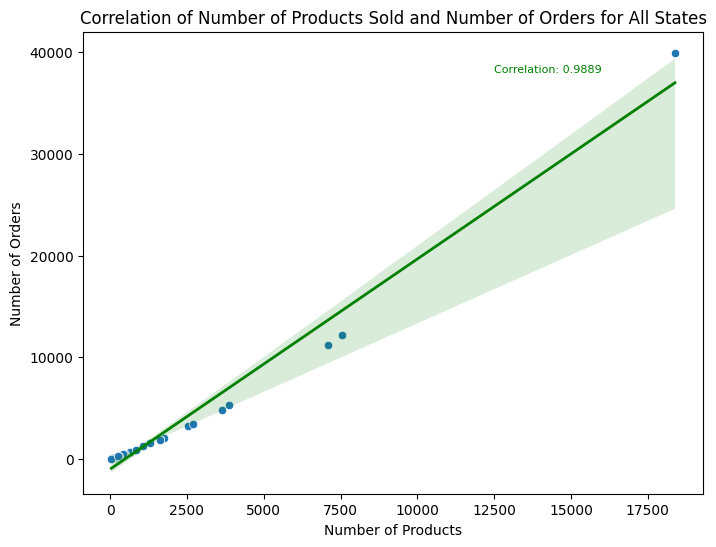

In [ ]:

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=group_data, x='num_products', y='num_orders')

# Add the correlation line using Seaborn's regplot
sns.regplot(data=group_data, x='num_products', y='num_orders', scatter=False, color='green', line_kws={"linewidth": 2})

# Customize the plot (optional)
plt.title('Correlation of Number of Products Sold and Number of Orders for All States')
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')

# Add the correlation coefficient as text to the plot
plt.text(12500, 38000, f'Correlation: {correlation_all:.4f}', fontsize=8, color='green')

# Show the plot
plt.show()

In [ ]:
pendapatan_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103172 entries, 0 to 103171
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103172 non-null  object        
 1   customer_id               103172 non-null  object        
 2   order_status              103172 non-null  object        
 3   order_purchase_timestamp  103172 non-null  datetime64[ns]
 4   customer_state            103172 non-null  object        
 5   payment_sequential        103172 non-null  float64       
 6   payment_type              103172 non-null  object        
 7   payment_installments      103172 non-null  float64       
 8   payment_value             103172 non-null  float64       
 9   product_id                103172 non-null  object        
 10  product_category          103172 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.7+ MB

In [ ]:
# Create function to calculate revenue per product category for specific state
# Use table 3 (revenue_products) and state list as an input
def calculate_revenue_per_product_cat(revenue_data, state_list):
    # Create an empty dictionary to store summaries for each state
    pendapatan_by_area = {}

    # Iterate through each state in the state_list
    for state in state_list:
        # Filter data for the current state
        state_data = revenue_data[revenue_data['customer_state'] == state]

        # Group by product category and sum payment values
        revenue_summary = state_data.groupby('product_category')['payment_value'].sum().reset_index()

        # Store the summary in the dictionary
        pendapatan_by_area[state] = revenue_summary

    return pendapatan_by_area

# Accessing revenue summary and calculate revenue proportion for a specific state
def calculate_revenue_proportion(revenue_by_state_dict, state):
    # Access the revenue summary for the specified state
    state_summary = revenue_by_state_dict.get(state)

    if state_summary is not None:
        # Calculate the revenue proportion
        state_summary['revenue_proportion'] = (state_summary['payment_value'] / state_summary['payment_value'].sum()) * 100

    state_summary.columns = ['product_category', 'revenue', 'revenue_proportion']
    return state_summary

# Create function to sort revenue per product category by the highest revenue
def sort_by_highest_revenue(revenue_summary):
    # Sort the summary by highest revenue in descending order
    sorted_summary = revenue_summary.sort_values(by='revenue', ascending=False)
    sorted_summary = sorted_summary.head(10).reset_index(drop=True)
    return sorted_summary

# Create function to sort revenue per product category by the lowest revenue
def sort_by_lowest_revenue(revenue_summary):
    # Sort the summary by lowest revenue in ascending order
    sorted_summary = revenue_summary.sort_values(by='revenue', ascending=True)
    sorted_summary = sorted_summary.head(10).reset_index(drop=True)
    return sorted_summary

# Top 5 states with highest revenue
states = ['SP', 'RJ', 'MG', 'RS', 'PR']

# Calculate revenue per product category for top 5 states
revenue_by_state_dict = calculate_revenue_per_product_cat(revenue_products, states)

In [ ]:
sp_summary = calculate_revenue_proportion(revenue_by_state_dict, 'SP')
highest_sp_summary = sort_by_highest_revenue(sp_summary)
highest_sp_summary

In [ ]:
rj_summary = calculate_revenue_proportion(revenue_by_state_dict, 'RJ')
highest_rj_summary = sort_by_highest_revenue(rj_summary)
highest_rj_summary

In [ ]:
mg_summary = calculate_revenue_proportion(revenue_by_state_dict, 'MG')
highest_mg_summary = sort_by_highest_revenue(mg_summary)
highest_mg_summary

In [ ]:
rs_summary = calculate_revenue_proportion(revenue_by_state_dict, 'RS')
highest_rs_summary = sort_by_highest_revenue(rs_summary)
highest_rs_summary

In [ ]:
pr_summary = calculate_revenue_proportion(revenue_by_state_dict, 'PR')
highest_pr_summary = sort_by_highest_revenue(pr_summary)
highest_pr_summary

In [ ]:

# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('Top 10 revenue-generating product SP', 'Top 10 revenue-generating product RJ', 'Top 10 revenue-generating product MG', 'Top 10 revenue-generating product RS', 'Top 10 revenue-generating product PR'))

# Add Plotly Express plots to each subplot
fig.add_trace(px.bar(highest_sp_summary, x='product_category', y='revenue').data[0], row=1, col=1)
fig.add_trace(px.bar(highest_rj_summary, x='product_category', y='revenue').data[0], row=1, col=2)
fig.add_trace(px.bar(highest_mg_summary, x='product_category', y='revenue').data[0], row=2, col=1)
fig.add_trace(px.bar(highest_rs_summary, x='product_category', y='revenue').data[0], row=2, col=2)
fig.add_trace(px.bar(highest_pr_summary, x='product_category', y='revenue').data[0], row=3, col=1)


# Update subplot titles (optional)
fig.update_layout(title_text='What are the top 10 revenue-generating product categories in each of those 5 states?',
                  autosize=False,
                  width=1000,
                  height=1200)

# Show the plot
fig.show()

In [ ]:
lowest_sp_summary = sort_by_lowest_revenue(sp_summary)
lowest_sp_summary

In [ ]:
lowest_rj_summary = sort_by_lowest_revenue(rj_summary)
lowest_rj_summary

In [ ]:
lowest_mg_summary = sort_by_lowest_revenue(mg_summary)
lowest_mg_summary

In [ ]:
lowest_rs_summary = sort_by_lowest_revenue(rs_summary)
lowest_rs_summary

In [ ]:
lowest_pr_summary = sort_by_lowest_revenue(pr_summary)
lowest_rs_summary

In [ ]:
#Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('10 product categories with the lowest revenue SP', '10 product categories with the lowest revenue RJ', '10 product categories with the lowest revenue MG', '10 product categories with the lowest revenue RS', '10 product categories with the lowest revenue PR'))

# Add Plotly Express plots to each subplot
fig.add_trace(px.bar(lowest_sp_summary, x='product_category', y='revenue').data[0], row=1, col=1)
fig.add_trace(px.bar(lowest_rj_summary, x='product_category', y='revenue').data[0], row=1, col=2)
fig.add_trace(px.bar(lowest_mg_summary, x='product_category', y='revenue').data[0], row=2, col=1)
fig.add_trace(px.bar(lowest_rs_summary, x='product_category', y='revenue').data[0], row=2, col=2)
fig.add_trace(px.bar(lowest_pr_summary, x='product_category', y='revenue').data[0], row=3, col=1)


# Update subplot titles (optional)
fig.update_layout(title_text='What are the 10 product categories with the lowest revenue in each of those 5 states?',
                  autosize=False,
                  width=1000,
                  height=1200)

# Show the plot
fig.show()

In [ ]:
order_category.info()

In [ ]:
# Create pivot table for summarizing number of orders per category (row) for each state (column)
orders_pivot = pd.crosstab(order_category['product_category'], order_category['customer_state'])

In [ ]:
# Create function to calculate orders per product category for specific state
# Use orders_pivot table and state list as an input

def select_top_10_categories_for_states(pivot_table, states):
    # Create an empty dataframe to store the top 10 product categories for each state
    top_10_categories_by_state = pd.DataFrame(columns=['State', 'Product_Category', 'Total_Orders'])

    # Iterate through each state in the specified list
    for state in states:
        # Sort the products for the current state in descending order and select the top 10
        top_10_for_state = pivot_table[state].nlargest(10)

        # Iterate through the top 10 product categories for the current state
        for category, orders in top_10_for_state.items():
            top_10_categories_by_state = pd.concat([top_10_categories_by_state, pd.DataFrame({
                'State': [state],
                'Product_Category': [category],
                'Total_Orders': [orders]
            })], ignore_index=True)

    return top_10_categories_by_state

In [ ]:
SP_cat_orders = select_top_10_categories_for_states(orders_pivot, ['SP'])
SP_cat_orders

In [ ]:
RJ_cat_orders = select_top_10_categories_for_states(orders_pivot, ['RJ'])
RJ_cat_orders

In [ ]:
MG_cat_orders = select_top_10_categories_for_states(orders_pivot, ['MG'])
MG_cat_orders

In [ ]:
RS_cat_orders = select_top_10_categories_for_states(orders_pivot, ['RS'])
RS_cat_orders

In [ ]:
PR_cat_orders = select_top_10_categories_for_states(orders_pivot, ['PR'])
PR_cat_orders

In [ ]:
# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=('Top 10 most-ordered product categories in SP', 'Top 10 most-ordered product categories in RJ', 'Top 10 most-ordered product categories in MG', 'Top 10 most-ordered product categories in RS', 'Top 10 most-ordered product categories in PR'))

# Add Plotly Express plots to each subplot
fig.add_trace(px.bar(SP_cat_orders, x='Product_Category', y='Total_Orders').data[0], row=1, col=1)
fig.add_trace(px.bar(RJ_cat_orders, x='Product_Category', y='Total_Orders').data[0], row=1, col=2)
fig.add_trace(px.bar(MG_cat_orders, x='Product_Category', y='Total_Orders').data[0], row=2, col=1)
fig.add_trace(px.bar(RS_cat_orders, x='Product_Category', y='Total_Orders').data[0], row=2, col=2)
fig.add_trace(px.bar(PR_cat_orders, x='Product_Category', y='Total_Orders').data[0], row=3, col=1)


# Update subplot titles (optional)
fig.update_layout(title_text='What are the top 10 most-ordered product categories in those five states?',
                  autosize=False,
                  width=1000,
                  height=1200)

# Show the plot
fig.show()

Which product category has lower scores?

In [ ]:
# creating an aggregation
avg_score_per_category = df.groupby('product_category_name_translation', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name_translation', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2